In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
dataset = pd.read_csv('insurance.csv')

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [70]:
dataset.corr()

,age,sex,bmi,children,smoker,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.333261
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.309418,1.000000


In [71]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'insuranceclaim'], dtype='object')

In [5]:
#shape
dataset.shape

(1338, 8)

In [6]:
#size
dataset.size

10704

In [7]:
#info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [8]:
#describe
dataset.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [10]:
#check for missing / null values 
dataset.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [72]:
#plotting barplot and boxplot to features vs charges for predicting best model to work 

Text(0.5, 1.0, 'Age vs Charges')

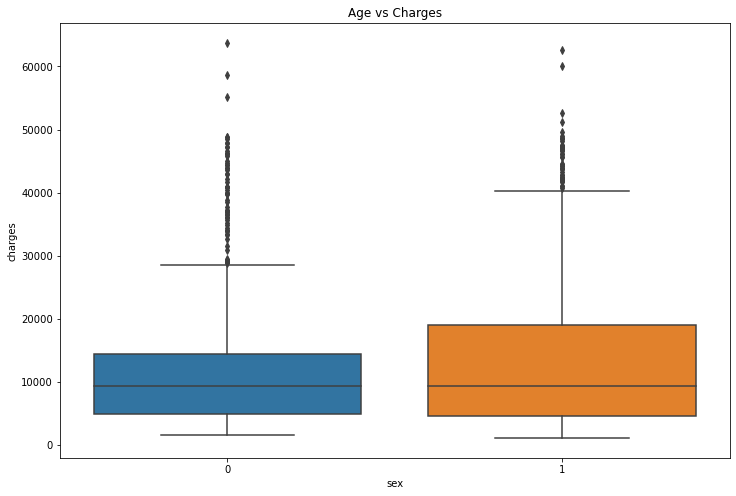

In [26]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'sex', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

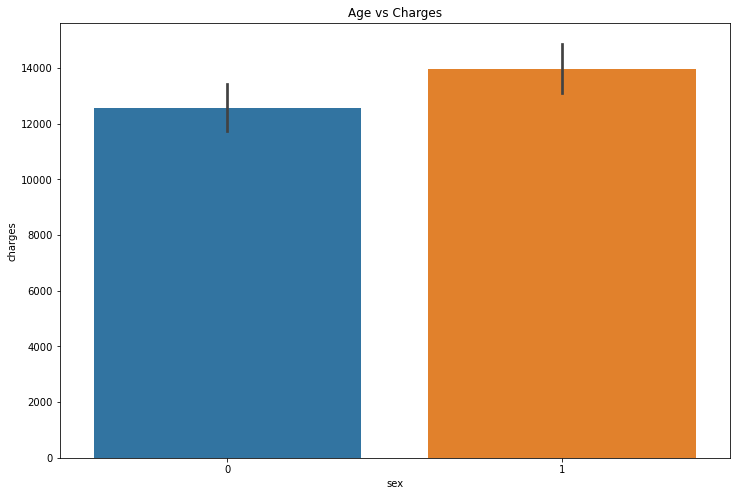

In [27]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'sex', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

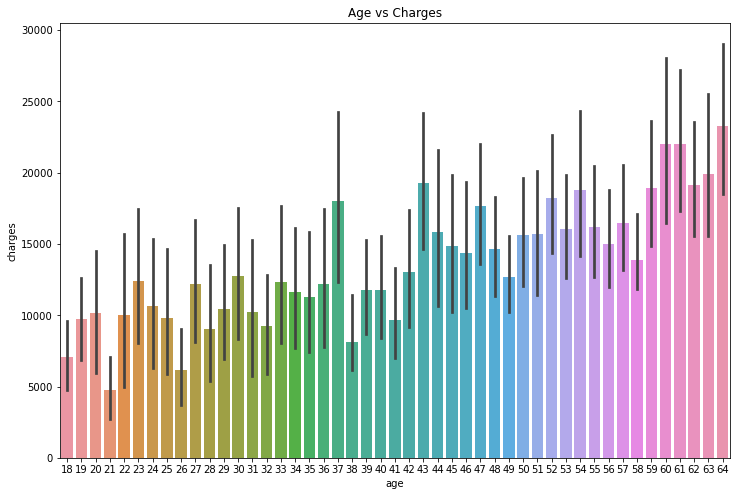

In [28]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

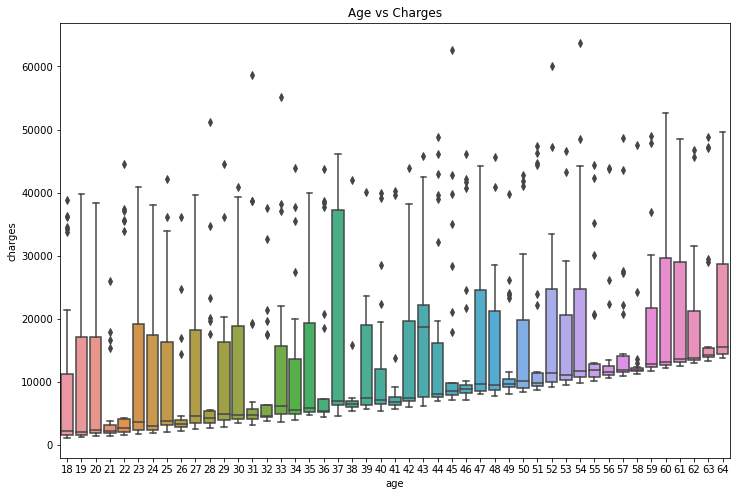

In [29]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'age', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

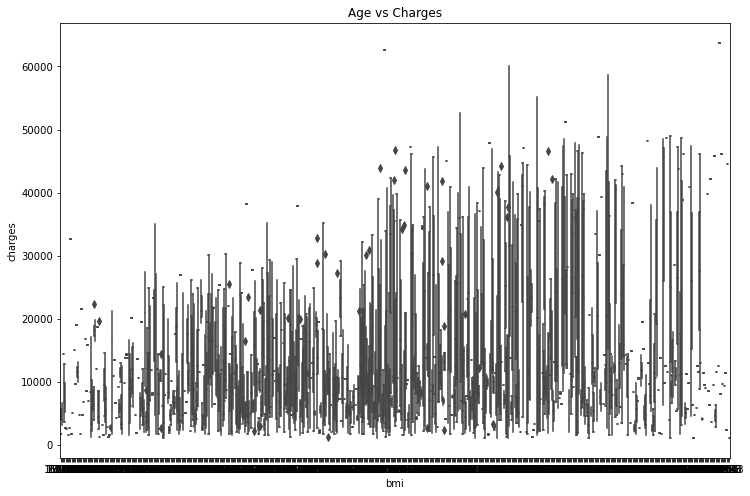

In [30]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'bmi', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

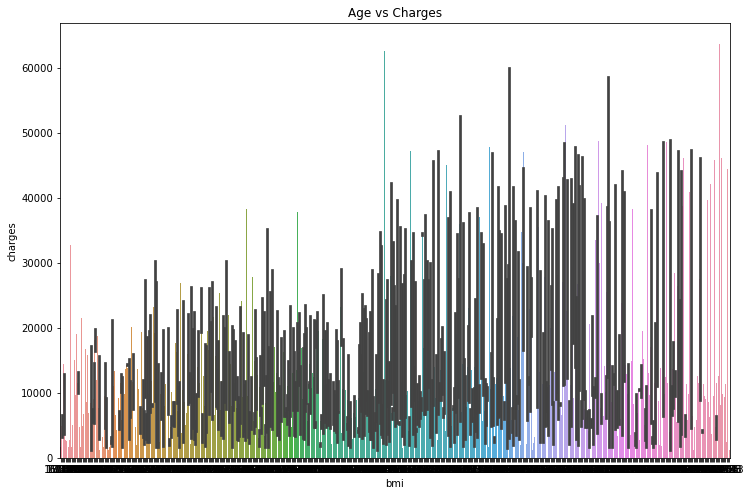

In [31]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'bmi', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

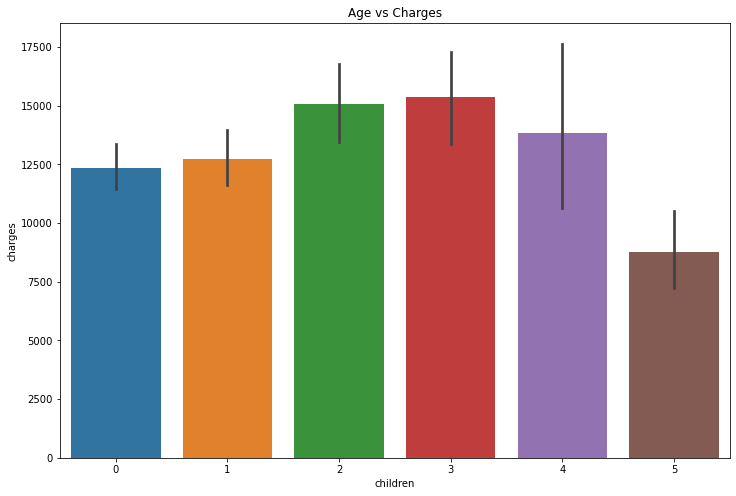

In [32]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = dataset)
plt.title("Age vs Charges")


Text(0.5, 1.0, 'Age vs Charges')

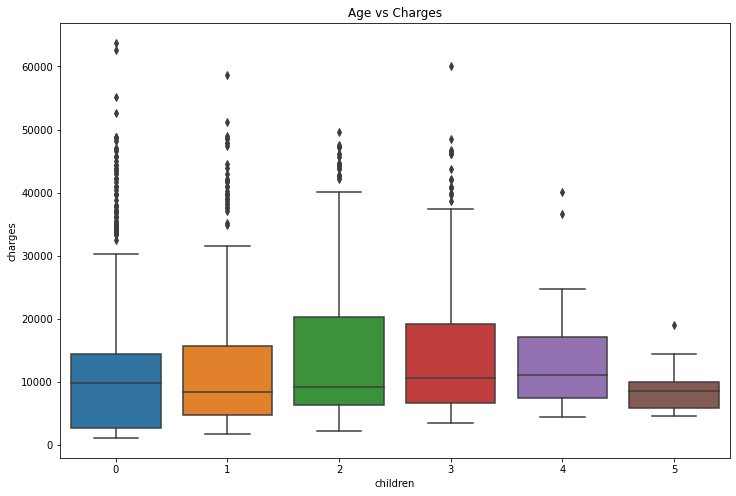

In [33]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'children', y = 'charges', data = dataset)
plt.title("Age vs Charges")


Text(0.5, 1.0, 'Age vs Charges')

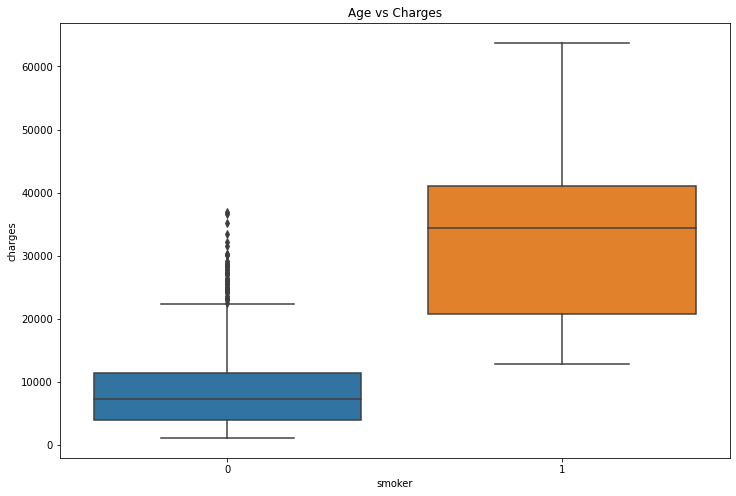

In [34]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'smoker', y = 'charges', data = dataset)
plt.title("Age vs Charges")


Text(0.5, 1.0, 'Age vs Charges')

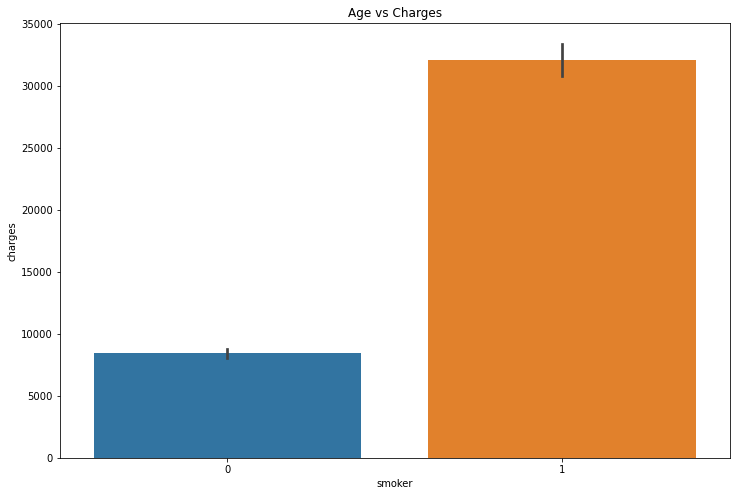

In [37]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'smoker', y = 'charges', data = dataset)
plt.title("Age vs Charges")


Text(0.5, 1.0, 'Age vs Charges')

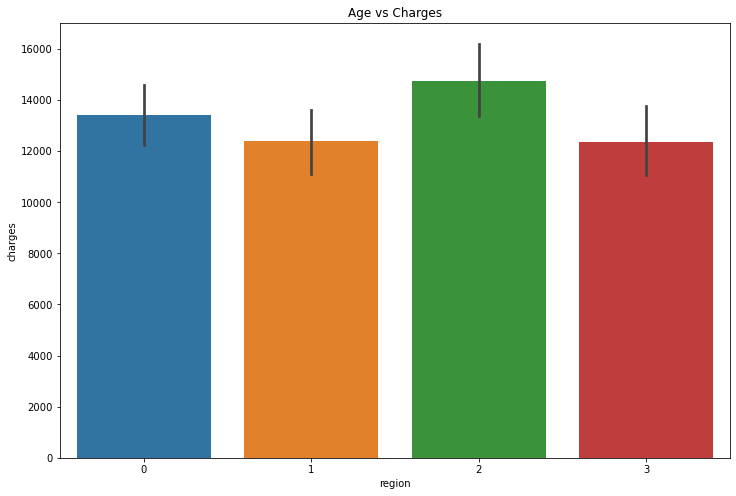

In [38]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = dataset)
plt.title("Age vs Charges")


Text(0.5, 1.0, 'Age vs Charges')

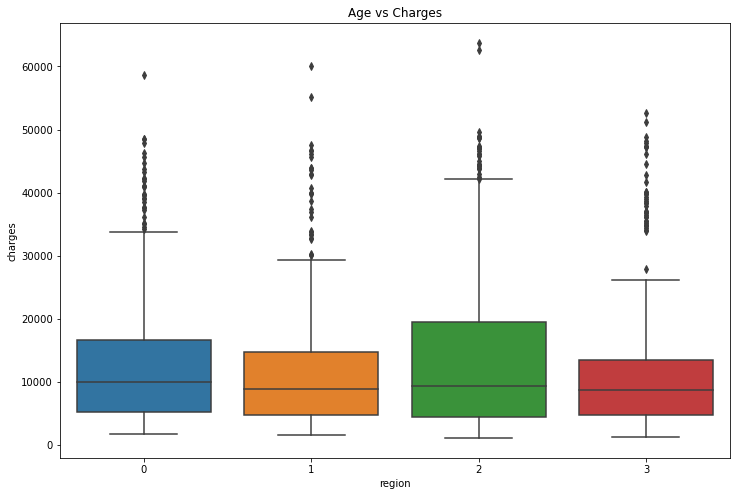

In [39]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'region', y = 'charges', data = dataset)
plt.title("Age vs Charges")


# drop onw feature (region) because region is not important for this prediction and other features are needed to insurance claim

In [41]:
#Dropping least important feature of the dataset
dataset = dataset.drop('region', axis = 1)

In [42]:
#label Encoding  for "sex" and "smoker"

In [53]:
from sklearn.preprocessing import LabelEncoder


In [45]:
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])

In [46]:
dataset.head()

,age,sex,bmi,children,smoker,charges,insuranceclaim
0,19,0,27.900,0,1,16884.92400,1
1,18,1,33.770,1,0,1725.55230,1
2,28,1,33.000,3,0,4449.46200,0
3,33,1,22.705,0,0,21984.47061,0
4,32,1,28.880,0,0,3866.85520,1


In [ ]:
#Assigning X and y

In [47]:
X = dataset.iloc[:,:5]
y = dataset.iloc[:,5]
print(X.shape)
print(y.shape)

(1338, 5)
(1338,)


In [48]:
# Splitting Dataset into testing and training

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [50]:
# applying standard scalar for X_train & y_test

In [55]:

# creating a standard scaler
sc = StandardScaler()
# feeding independents sets into the standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Applying Linear Regressor Model

In [61]:
# Linear Regression
# creating the Linear Regression model
lR = LinearRegression()
# # feeding the training data to the model
lR.fit(X_train, y_train)
y_pred_lR = lR.predict(X_test)
lR.score(X_train,y_train)


0.7463716002316689

In [63]:
#applying svm model

In [64]:
from sklearn.svm import SVR

In [66]:

# creating the model
svr = SVR()
# feeding the training data to the model
svr.fit(X_train, y_train)
# predicting the test set results
y_pred_svr = svr.predict(X_test)
svr.score(X_train,y_train)


-0.09361994960428022

In [67]:
#applying Random Forest Model to predict

In [69]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
# Predicting a new result
y_pred = regressor.predict(X_test)
regressor.score(X_train,y_train)


0.9640086046250348

In [ ]:
#from the above prediction random forest model is predicting the best accuracy for insurance claim dataset